### Basic Image Recognition with Built-in Models in Keras

In this notebook we are going to look at Image Recognition with built-in models available in [Keras](https://keras.io/applications/). There are various pre-trained models available Keras. The weights for these models are trained on a subset of ImageNet dataset. ImageNet is an image dataset containing millions of images with each image described in words. The models are trained on a dataset of 1000 types of common objects (the list of 1000 [categories](http://image-net.org/challenges/LSVRC/2015/browse-synsets)). This dataset is used during The ImageNet Large Scale Visual Recognition Challenge ([ILSVRC](http://www.image-net.org/challenges/LSVRC/)).

The models for image classification available in Keras are listed below:

* Xception

* VGG16

* VGG19

* ResNet50

* InceptionV3

* InceptionResNetV2

* MobileNet

* DenseNet

* NASNet

Once the model is instantiated, the weights are automatically downloaded to _~/.keras/models/_ folder. We will be implementing ResNet50 (50 Layer Residual Network - further reading: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)) in the example below. The file containing weights for ResNet50 is about 100MB.


#### The versions

In this example I am using Keras v.2.1.4 and TensorFlow v.1.5.0 with GPU (using NVIDIA CUDA).

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Importing keras and tensorflow, and printing the versions
import keras
print('Keras: {}'.format(keras.__version__))

import tensorflow as tf
print('TensorFlow: {}'.format(tf.__version__))

Using TensorFlow backend.


Keras: 2.1.4
TensorFlow: 1.5.0


In [2]:
# Imports libraries
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [3]:
# Defining the model
model = ResNet50(weights='imagenet')

The input size for ResNet50 model is 224x224 pixels. We need to load the image, resize it to default input size, and then convert it to a Numpy array. Keras is expecting a list of images, so another dimension needs to be added to the array. Finally we need to normalize the image using _preprocess input_ method.

In [4]:
# Image path
path = 'data/images/ball_test.jpg'

# Loading the image, and resizing it to default size
img = image.load_img(path, target_size=(224, 224))

# Converting the image to a Numpy array
x = image.img_to_array(img)

# Adding extra dimension
x = np.expand_dims(x, axis=0)

# Scaling the image
x = preprocess_input(x)

It is time to run the image through the Neural Network and predict the classes. Each prediction array consists of 1000 elements with the likelihood of each element in array being in the picture. We can decode the prediction into a list of most likely results, in a format of tuples containing ImageNet id, description, and probability.

In [5]:
# Running the image through the model
prediction = model.predict(x)

# Decoding predictions. By default, it shows top 5 results
decoded = decode_predictions(prediction, top=3)[0]

In the below cell, we are creating a method for displaying the image with the predictions annotated on it:

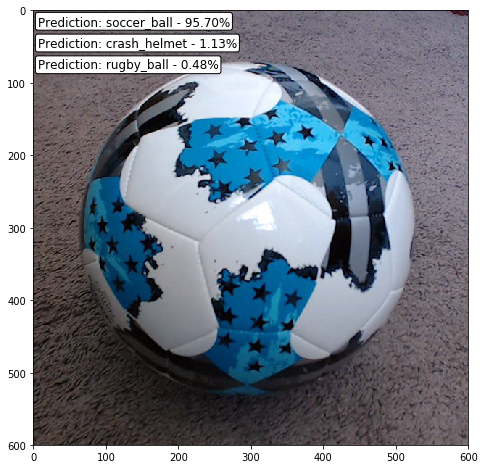

In [6]:
def plot_prediction(path, decoded):
    # Defining the figure size
    plt.figure(figsize=(8, 8))

    # Loading the image with cv2 library, and displaying RGB colors
    photo = cv2.imread(path)
    RGB_photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)

    # Starting coordinates of an annotated text
    text_x = 6
    text_y = 20

    # Looping through the decoded results to print the annotations
    for nId, label, probability in decoded:
        plt.text(text_x, text_y, 'Prediction: {} - {:.2f}%'.format(label, probability * 100),
                 fontsize=12, color='k', 
                 bbox=dict(boxstyle="round", pad=0.2, fc='white'))
        text_y += 30

    # Displaying the image
    plt.imshow(RGB_photo);
    
plot_prediction(path, decoded)

As it is shown in the above image, the model classified the image as a soccer ball with a probability of 95.7%. Let's look at some other examples:

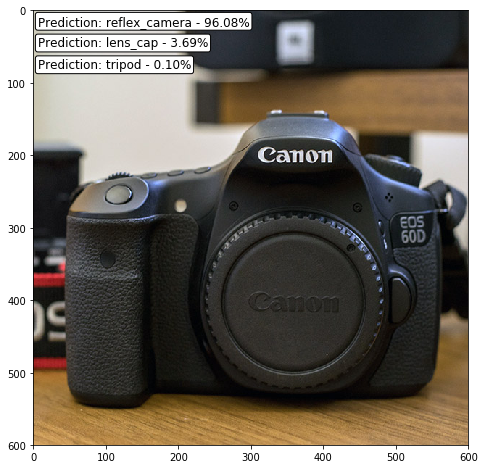

In [7]:
path = 'data/images/camera_test.jpg'

img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction = model.predict(x)
decoded = decode_predictions(prediction, top=3)[0]

plot_prediction(path, decoded)

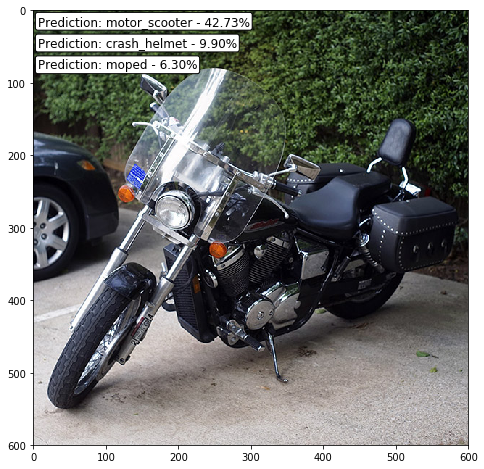

In [8]:
path = 'data/images/moto_test.jpg'

img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
prediction = model.predict(x)
decoded = decode_predictions(prediction, top=3)[0]

plot_prediction(path, decoded)

The predictions are not always perfect. The category _motorcycle_ is not available in the dataset. Instead, the model identified the image as a motor scooter with probability of 42.7%. 

#### Summary

In this notebook, I demonstrated the implementation of pre-trained Keras models for Image Recognition tasks. These models are a good starting point for image classification, and can save time and resources for training a classifier from scratch. Also the models can be used for real-time object classification.